In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/tianyuwu/Desktop/MLDS/23Fall/MLDS 400_Everything Starts with Data/Project/final_data_update_by_feature.csv', index_col=0)
df

,SKU,STORE,STYPE,AMT,ReturnPercentage,InventoryTurnover,GrossProfit
0,3,202,P,30.00,93.181818,123.36,316.64
1,3,202,R,30.00,93.181818,123.36,316.64
2,3,303,P,12.00,-inf,0.00,0.00
3,3,709,P,30.00,-inf,0.00,0.00
4,3,802,P,30.00,93.181818,123.36,316.64
...,...,...,...,...,...,...,...
120916891,9999997,7507,P,39.00,0.000000,15.00,4.50
120916892,9999997,7907,P,39.00,0.000000,15.00,4.50
120916893,9999997,7907,R,39.00,0.000000,15.00,4.50
120916894,9999997,7907,P,39.00,0.000000,15.00,4.50


In [3]:
total_sales_returns = df.groupby(['STORE', 'STYPE'])['AMT'].sum().unstack(fill_value=0)
total_sales_returns['ReturnPercentage'] = (total_sales_returns['R'] / (total_sales_returns['P'] + total_sales_returns['R'])) * 100

df = df.merge(total_sales_returns['ReturnPercentage'].reset_index(), on='STORE', how='left')
df

,SKU,STORE,STYPE,AMT,ReturnPercentage_x,InventoryTurnover,GrossProfit,ReturnPercentage_y
0,3,202,P,30.00,93.181818,123.36,316.64,10.580729
1,3,202,R,30.00,93.181818,123.36,316.64,10.580729
2,3,303,P,12.00,-inf,0.00,0.00,11.608282
3,3,709,P,30.00,-inf,0.00,0.00,9.199877
4,3,802,P,30.00,93.181818,123.36,316.64,10.331778
...,...,...,...,...,...,...,...,...
120916891,9999997,7507,P,39.00,0.000000,15.00,4.50,11.588933
120916892,9999997,7907,P,39.00,0.000000,15.00,4.50,9.791242
120916893,9999997,7907,R,39.00,0.000000,15.00,4.50,9.791242
120916894,9999997,7907,P,39.00,0.000000,15.00,4.50,9.791242


In [4]:
df2 = df.groupby('STORE')[['InventoryTurnover', 'GrossProfit', 'ReturnPercentage_y']].mean()

In [5]:
df2['success'] = ((df2['InventoryTurnover'] > df2['InventoryTurnover'].quantile(0.50)) &
                          (df2['GrossProfit'] > df2['GrossProfit'].quantile(0.50)) &
                          (df2['ReturnPercentage_y'] > df2['ReturnPercentage_y'].quantile(0.05))).astype(int)
df2

,InventoryTurnover,GrossProfit,ReturnPercentage_y,success
STORE,,,,
102,10.834319,21.939181,9.144570,1
103,8.278934,26.848745,11.148399,0
107,8.205485,24.587056,10.401991,0
202,8.451904,19.880379,10.580729,1
203,8.216873,24.269365,12.836250,0
...,...,...,...,...
9709,8.040999,15.466073,8.947697,0
9804,7.525270,21.172660,9.088367,0
9806,13.514492,18.074173,4.093787,0


# Data Viz

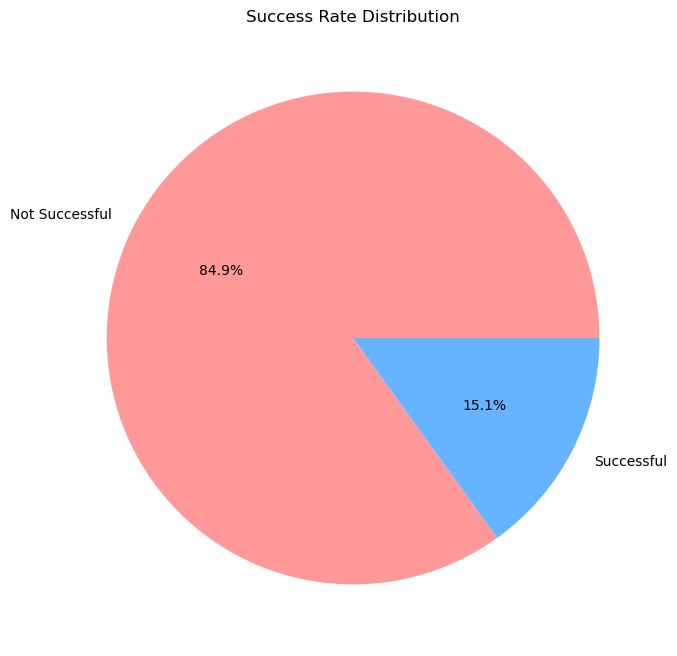

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df2['success'].value_counts(), labels=['Not Successful', 'Successful'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])

# Add title
plt.title('Success Rate Distribution')

plt.show()

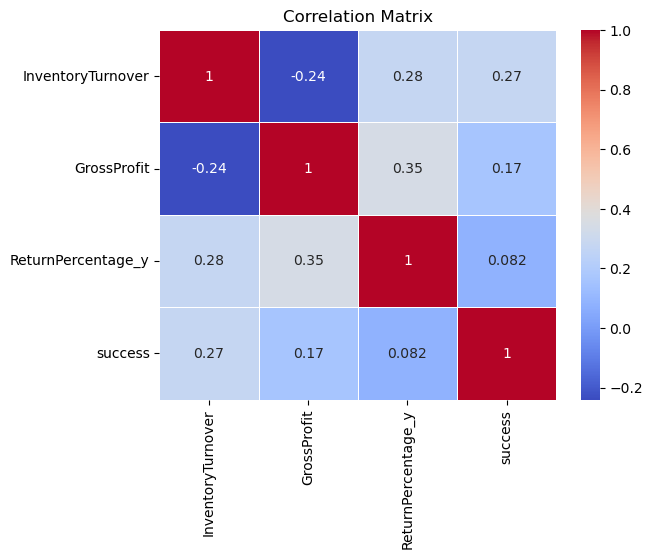

In [7]:
# Visualize the correlation matrix
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

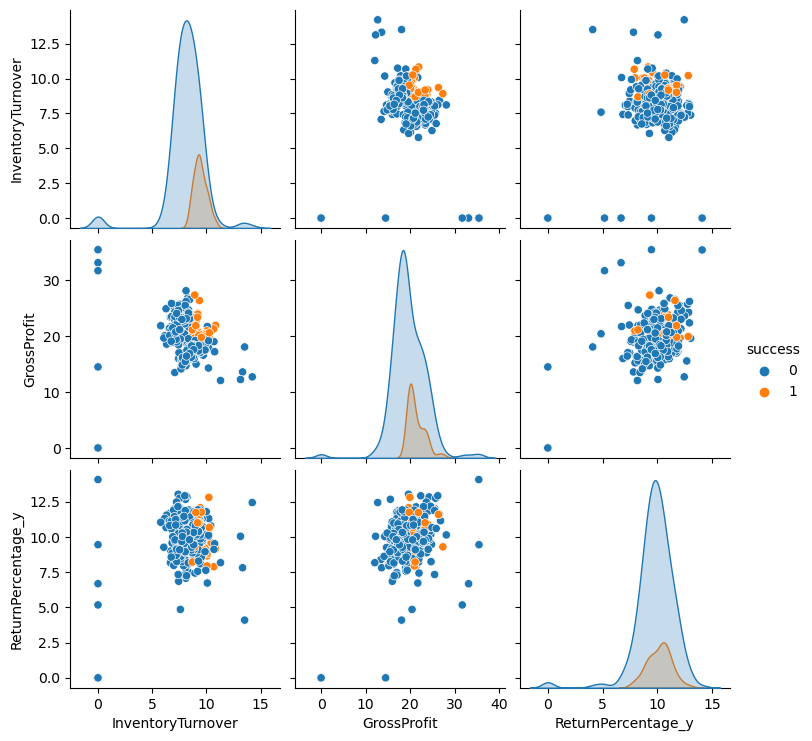

In [8]:
# Pairplot for selected features
sns.pairplot(df2[['InventoryTurnover', 'GrossProfit', 'ReturnPercentage_y', 'success']], hue='success', diag_kind='kde')
plt.show()

# Data Engineering

In [9]:
# Create interaction features
df2['Interaction1'] = df2['InventoryTurnover'] * df2['GrossProfit']
#df2['Interaction2'] = df2['ReturnPercentage_y'] / df2['InventoryTurnover']
df2.fillna(df2.mean(), inplace=True)

In [10]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
df2[['InventoryTurnover', 'GrossProfit', 'ReturnPercentage_y', 'Interaction1']] = scaler.fit_transform(df2[['InventoryTurnover', 'GrossProfit', 'ReturnPercentage_y', 'Interaction1']])
df2

/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

,InventoryTurnover,GrossProfit,ReturnPercentage_y,success,Interaction1
STORE,,,,,
102,1.504204,0.572738,-0.428290,1,2.085831
103,-0.028098,1.934163,0.803168,0,1.649356
107,-0.072141,1.306996,0.344461,0,1.068121
202,0.075620,0.001831,0.454305,1,0.113423
203,-0.065313,1.218900,1.840441,0,1.002144
...,...,...,...,...,...
9709,-0.170773,-1.222259,-0.549278,0,-1.122764
9804,-0.480023,0.360182,-0.462829,0,-0.132800
9806,3.111334,-0.499031,-3.532260,0,2.271755


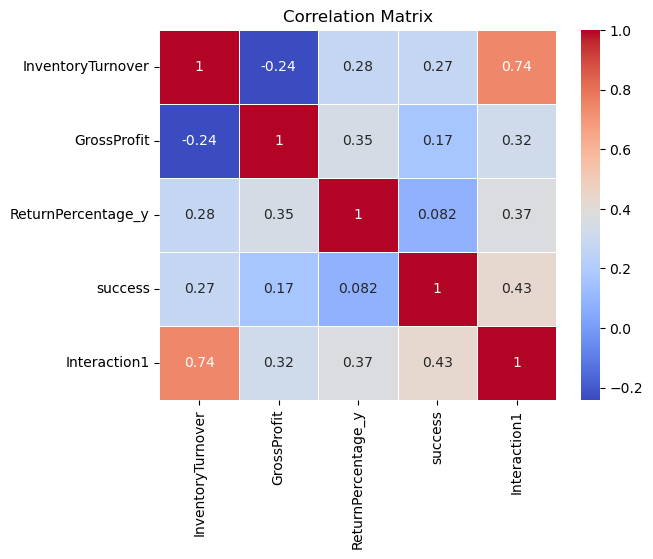

In [11]:
# Visualize the correlation matrix
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Model Evaluation

In [12]:
import sklearn
print(sklearn.__version__)

1.2.2


In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming df2 is your DataFrame
X = df2[['InventoryTurnover', 'GrossProfit', 'ReturnPercentage_y', 'Interaction1']]
y = df2['success']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Use SMOTE to oversample the minority class
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if

## Logistic Regression Hyperparameters

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define the features
X_train_resampled = df2[['InventoryTurnover', 'GrossProfit', 'ReturnPercentage_y', 'Interaction1']]
X_test = df2[['InventoryTurnover', 'GrossProfit', 'ReturnPercentage_y', 'Interaction1']]

# Define the target variable
y_train_resampled = df2['success']
y_test = df2['success']

# Create a pipeline for logistic regression
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('logreg', LogisticRegression())  # Logistic Regression model
])

# Define hyperparameters for logistic regression
logreg_params = {'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search for logistic regression
logreg_grid = GridSearchCV(logreg_pipeline, logreg_params, cv=5)
logreg_grid.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters for logistic regression
print("Best Hyperparameters for Logistic Regression:", logreg_grid.best_params_)

# Make predictions on the test set using the best logistic regression model
y_pred_logreg = logreg_grid.predict(X_test)

# Evaluate the logistic regression model
print("\nAccuracy Score (Logistic Regression):")
print(accuracy_score(y_test, y_pred_logreg))

print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_logreg))

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))

Best Hyperparameters for Logistic Regression: {'logreg__C': 100}

Accuracy Score (Logistic Regression):
0.9006024096385542

Confusion Matrix (Logistic Regression):
[[271  11]
 [ 22  28]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       282
           1       0.72      0.56      0.63        50

    accuracy                           0.90       332
   macro avg       0.82      0.76      0.79       332
weighted avg       0.89      0.90      0.90       332



/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if

## Random Forest

In [18]:
# Create a pipeline for random forest classifier
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('rf', RandomForestClassifier())  # Random Forest model
])

# Define hyperparameters for random forest
rf_params = {'rf__n_estimators': [50, 100, 200],
             'rf__max_depth': [None, 10, 20, 30]}

# Perform grid search for random forest
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5)
rf_grid.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters for random forest
print("\nBest Hyperparameters for Random Forest:", rf_grid.best_params_)

# Make predictions on the test set using the best random forest model
y_pred_rf = rf_grid.predict(X_test)

# Evaluate the random forest model
print("\nAccuracy Score (Random Forest):")
print(accuracy_score(y_test, y_pred_rf))

print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if

/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 


Best Hyperparameters for Random Forest: {'rf__max_depth': 10, 'rf__n_estimators': 100}

Accuracy Score (Random Forest):
1.0

Confusion Matrix (Random Forest):
[[282   0]
 [  0  50]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       1.00      1.00      1.00        50

    accuracy                           1.00       332
   macro avg       1.00      1.00      1.00       332
weighted avg       1.00      1.00      1.00       332



/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/tianyuwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 